In [ ]:
Cheng Shi
CaronShi
8556138235

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#https://archive.ics.uci.edu/ml/datasets/Vertebral+Column#
bio_attr = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle','sacral slope', 
            'pelvic radius','grade of spondylolisthesis','class']
c2 = pd.read_csv('vertebral_column_data/column_2C.dat', sep=' ',names=bio_attr)

c2.loc[c2["class"] == "AB", "class"] = 1
c2.loc[c2["class"] == "NO", "class"] = 0

     pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0               63.03        22.55                  39.61         40.48   
1               39.06        10.06                  25.02         29.00   
2               68.83        22.22                  50.09         46.61   
3               69.30        24.65                  44.31         44.64   
4               49.71         9.65                  28.32         40.06   
..                ...          ...                    ...           ...   
305             47.90        13.62                  36.00         34.29   
306             53.94        20.72                  29.22         33.22   
307             61.45        22.69                  46.17         38.75   
308             45.25         8.69                  41.58         36.56   
309             33.84         5.07                  36.64         28.77   

     pelvic radius  grade of spondylolisthesis class  
0            98.67                       -0.

(b)i.Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

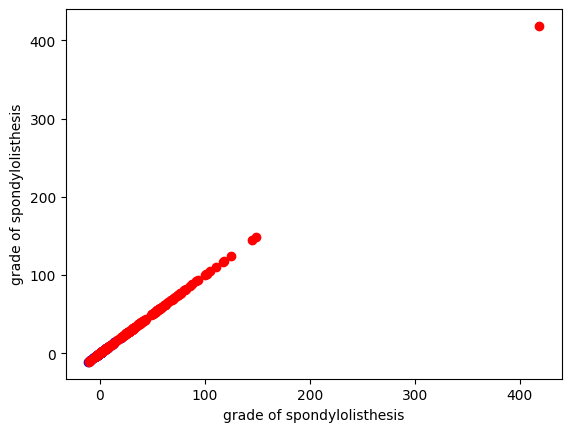

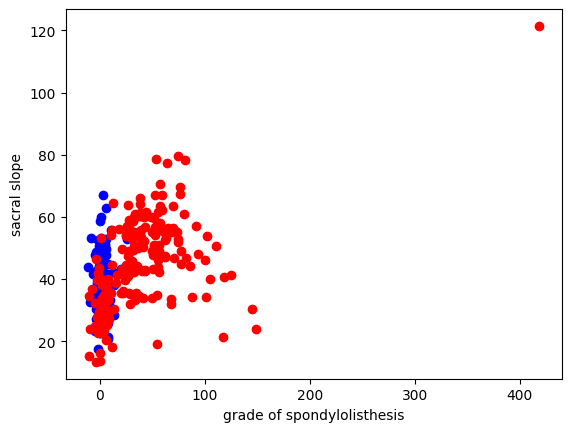

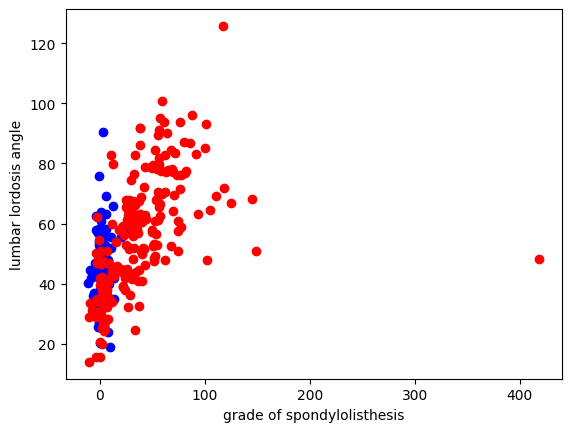

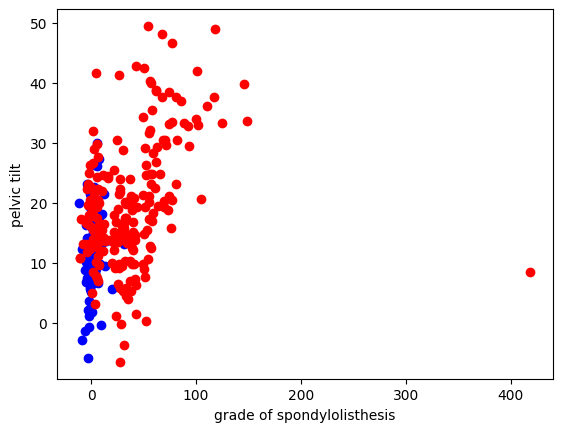

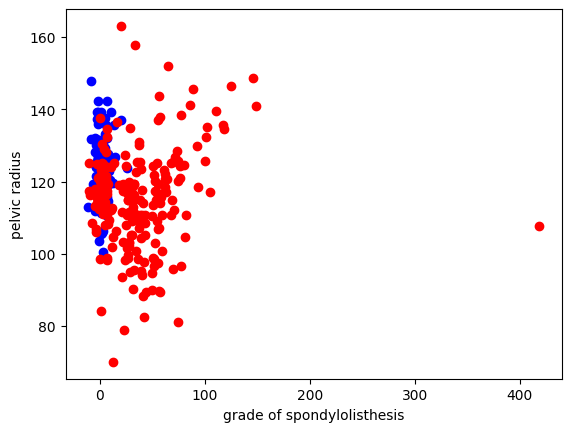

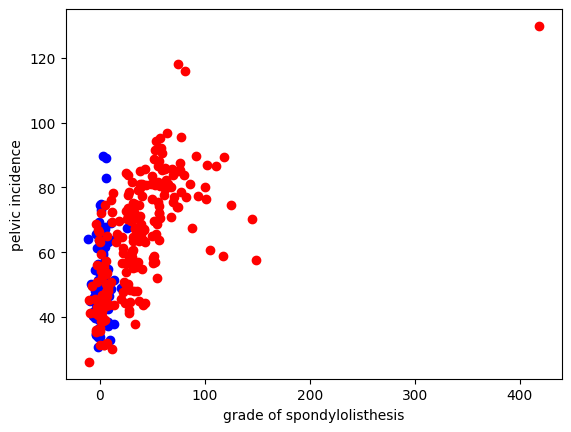

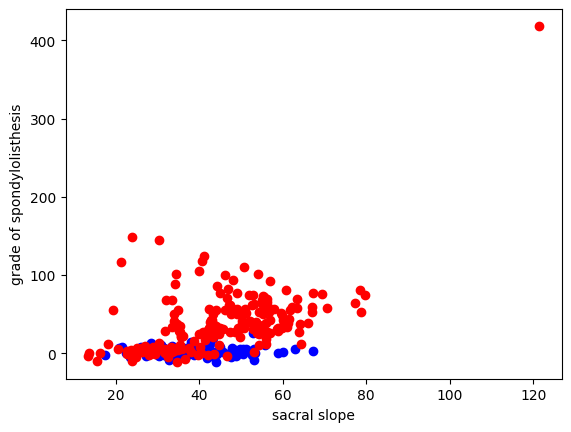

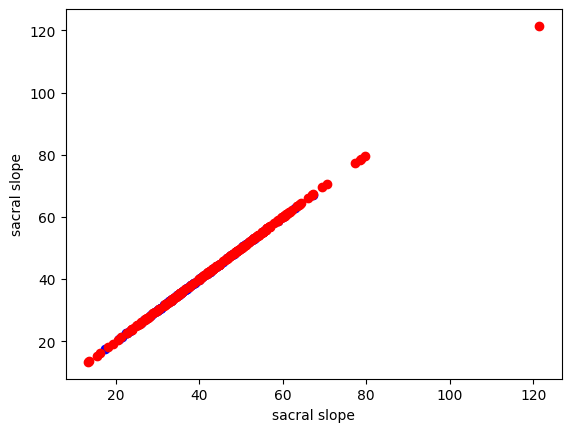

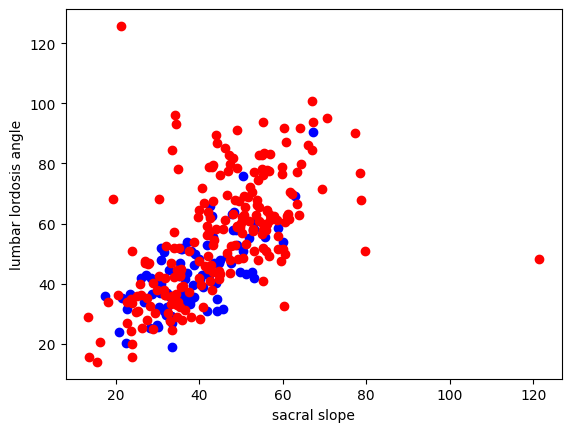

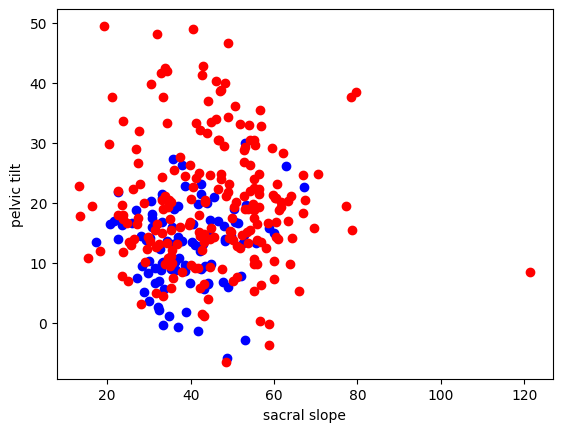

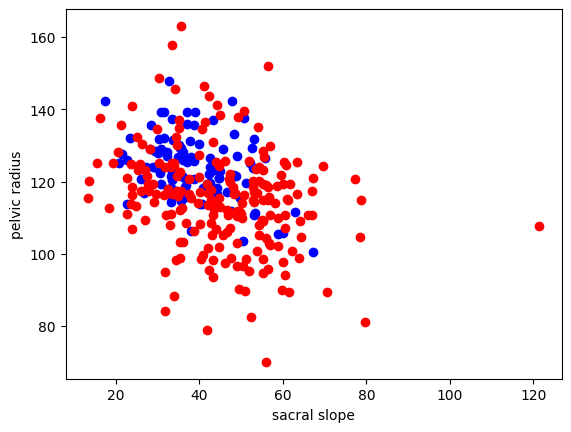

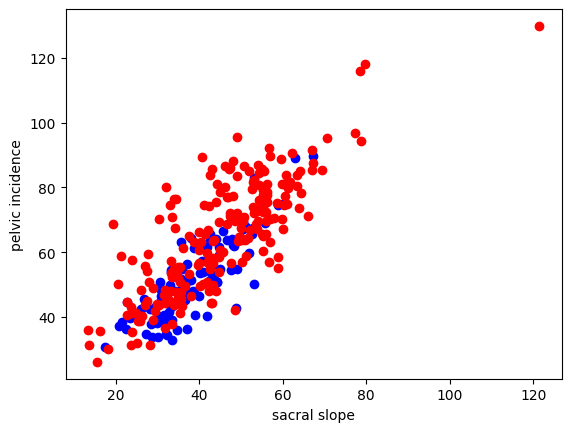

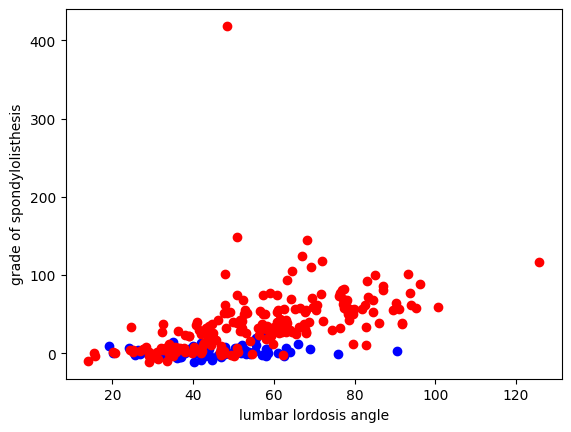

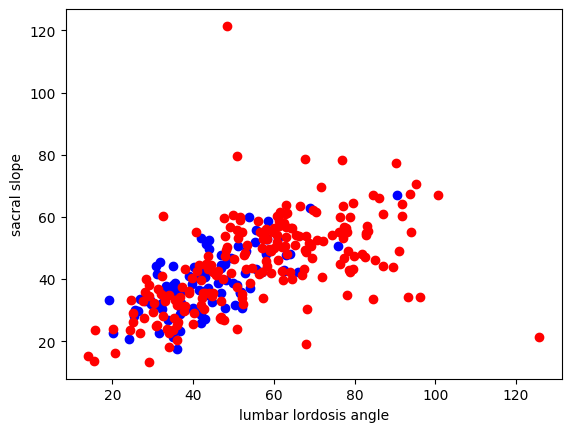

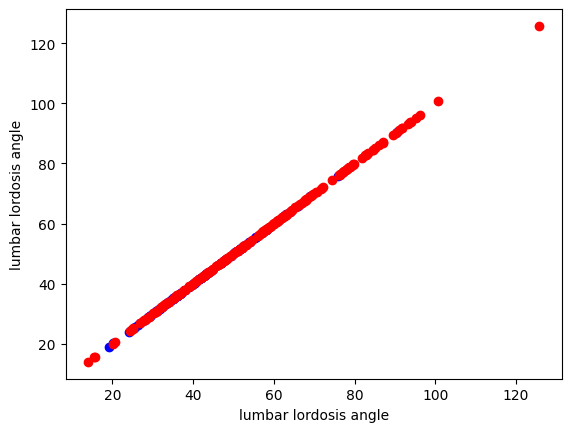

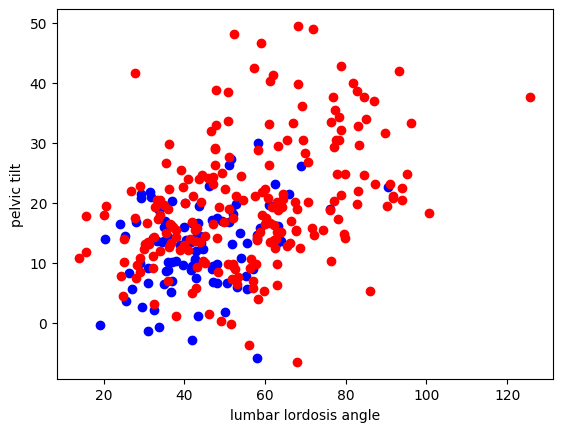

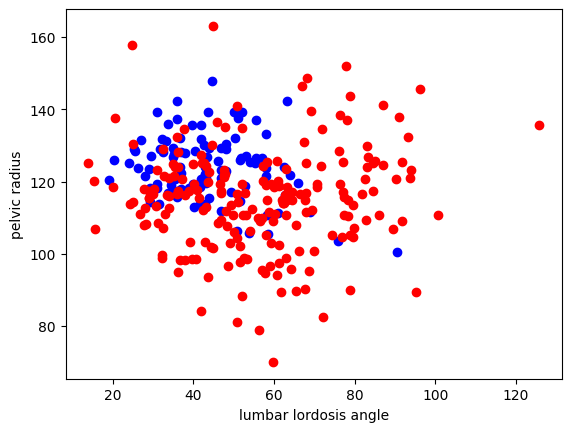

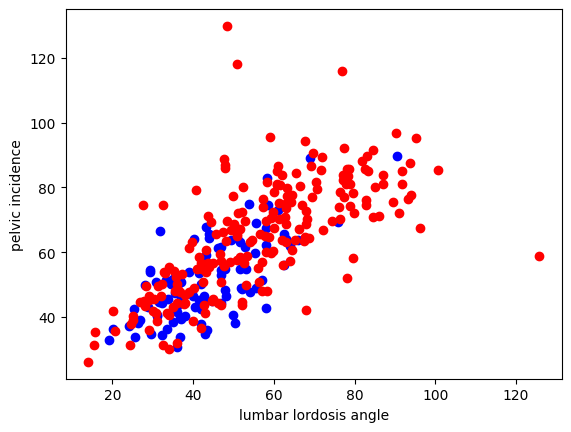

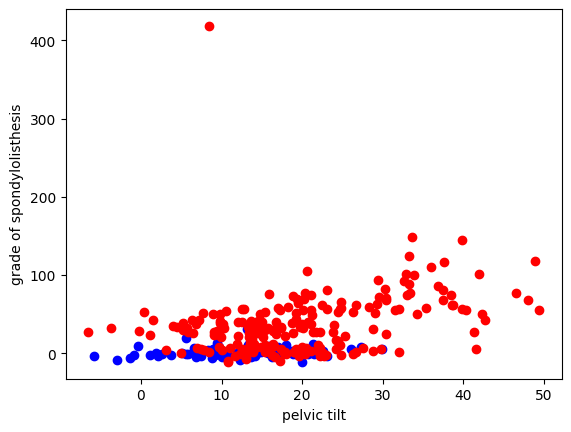

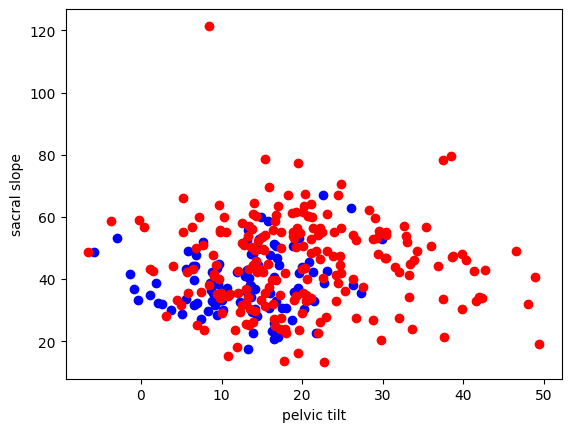

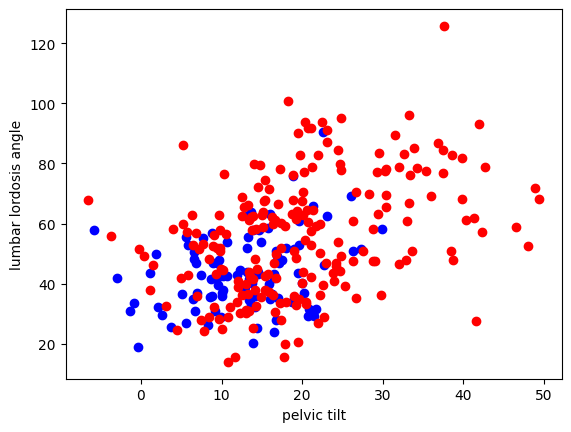

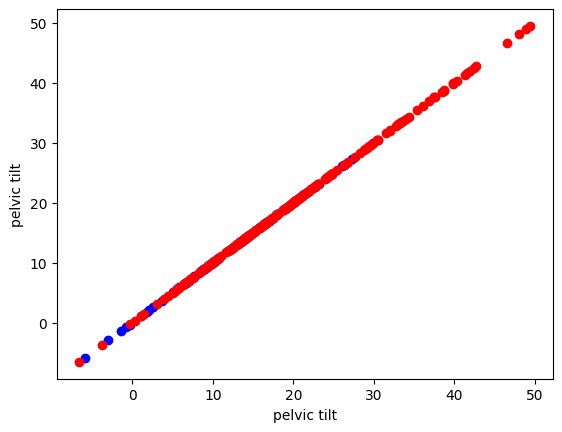

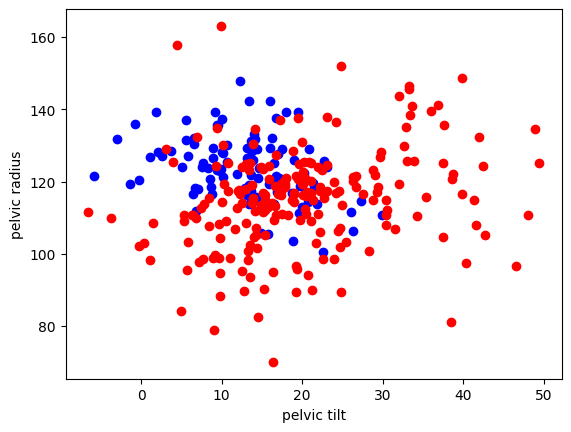

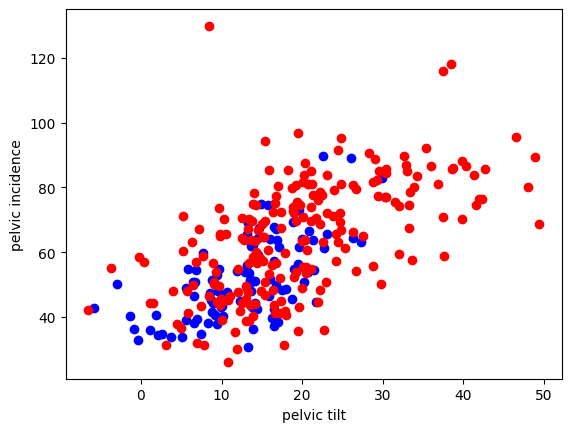

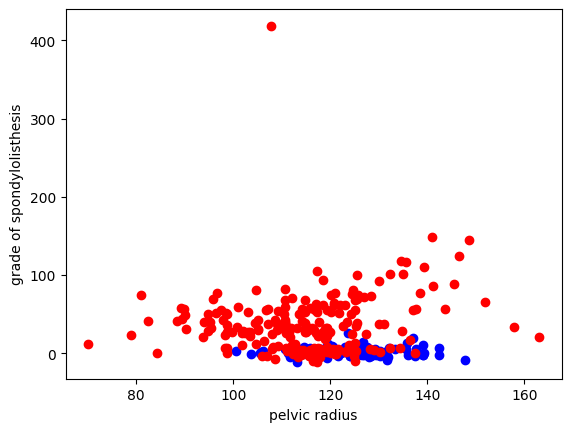

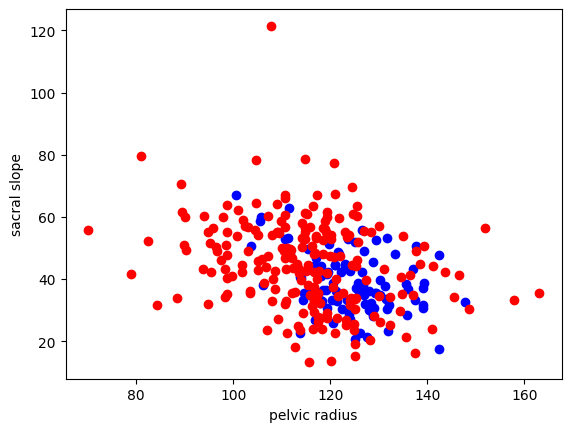

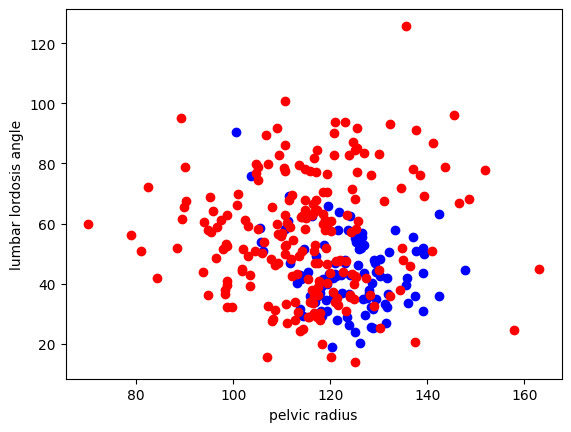

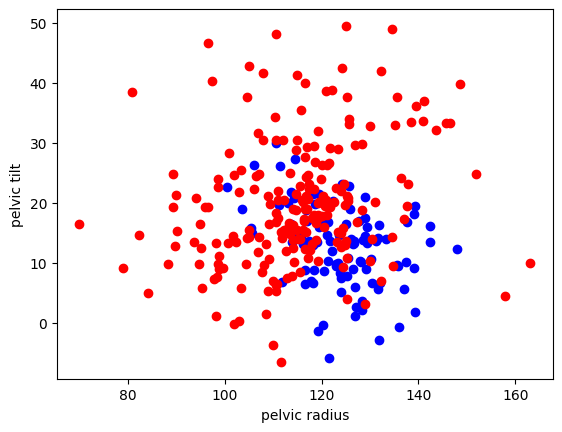

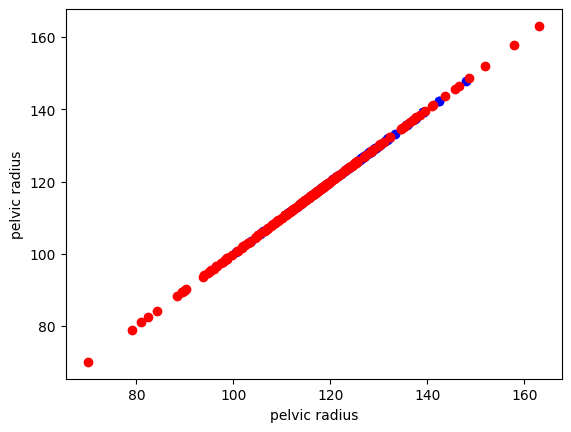

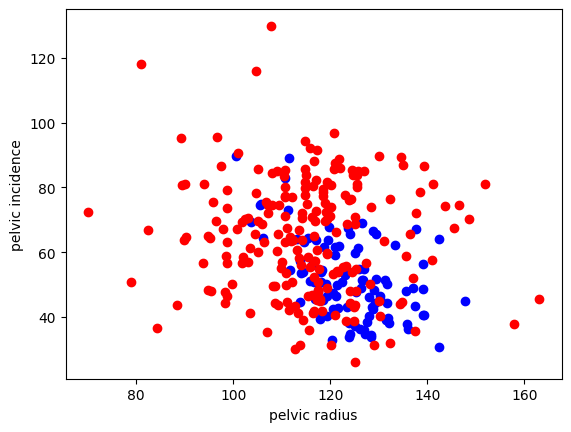

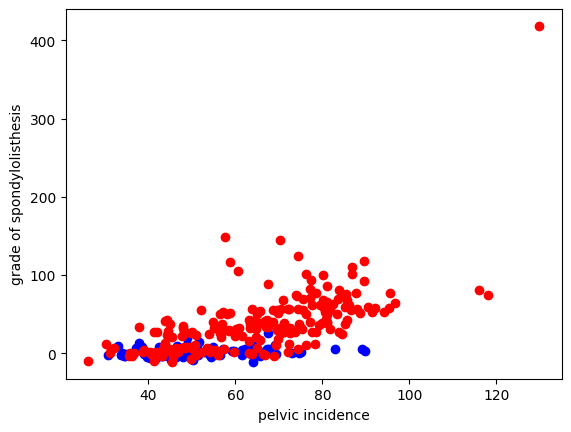

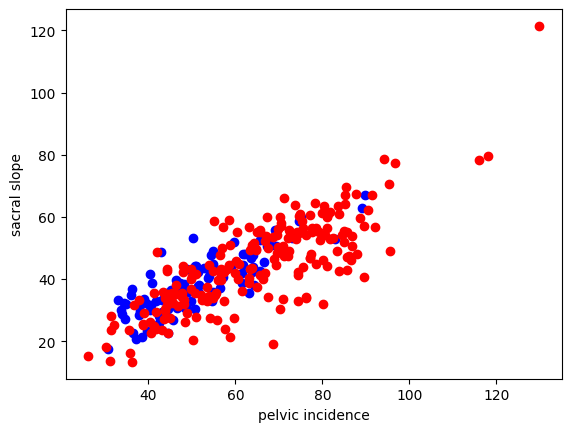

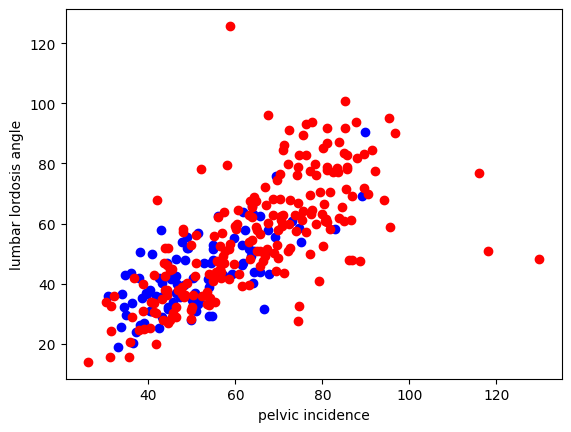

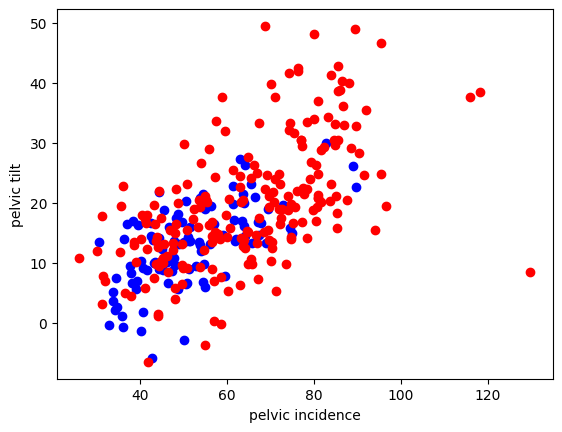

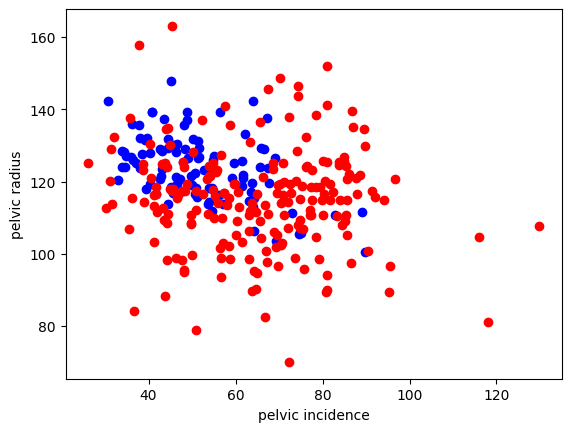

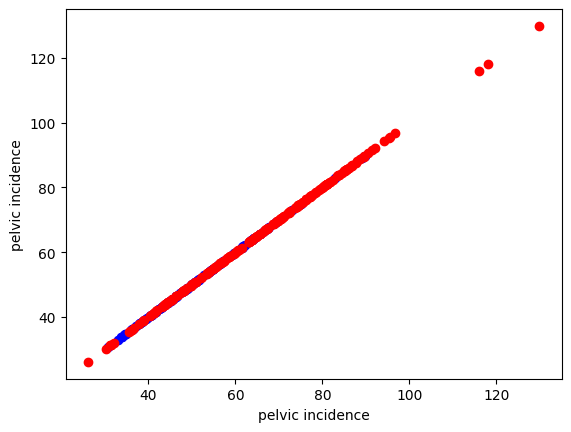

In [195]:
NO = c2[c2["class"] == 0]
AB = c2[c2["class"] == 1] 
bio_set = list(set(bio_attr)-set(['class'])) #excluding c2['class']

for attr1 in range(0,len(bio_set)):
    for attr2 in range(0,len(bio_set)):
        plt.scatter(NO[bio_set[attr1]],NO[bio_set[attr2]], color='blue')
        plt.scatter(AB[bio_set[attr1]],AB[bio_set[attr2]], color='red')
        plt.xlabel(bio_set[attr1])
        plt.ylabel(bio_set[attr2]) 
        plt.show()


(b)ii.Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).
https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

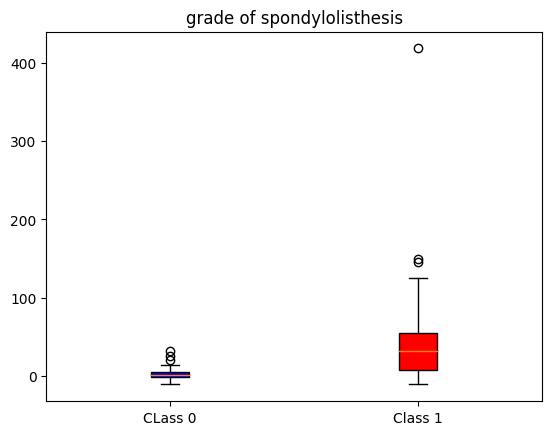

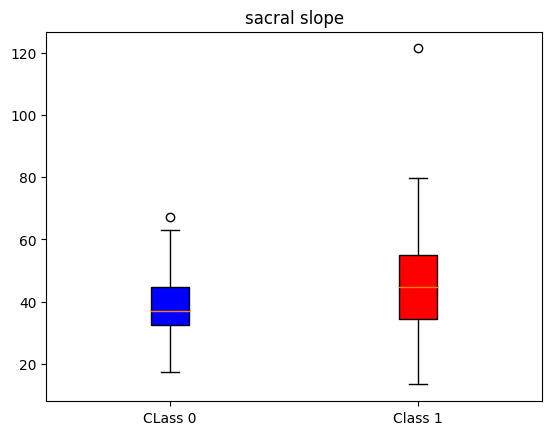

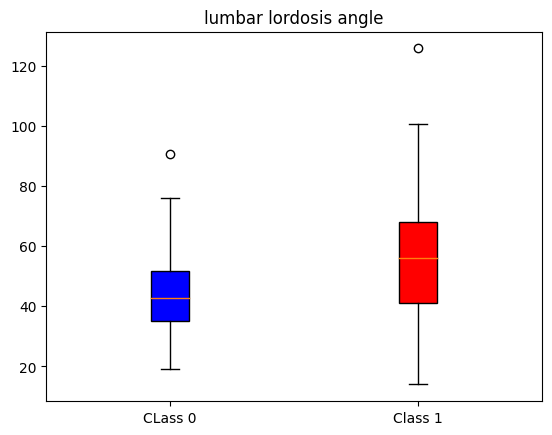

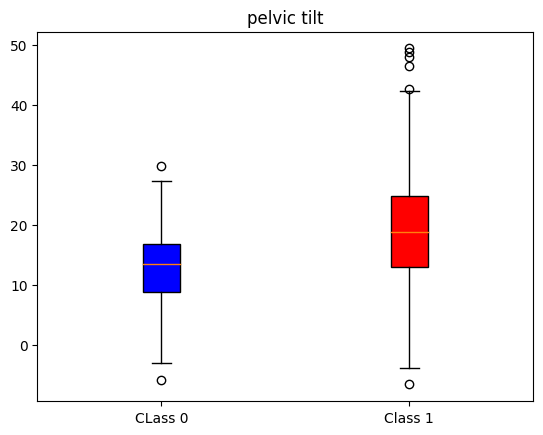

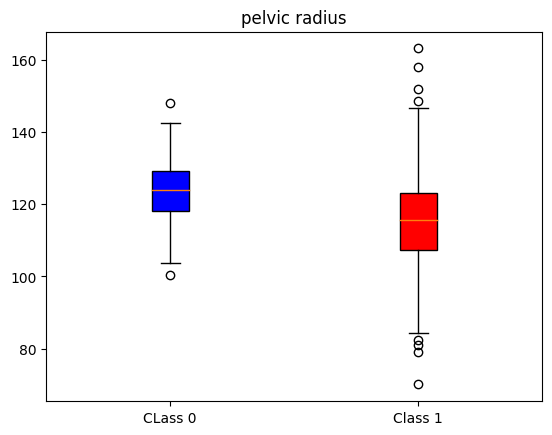

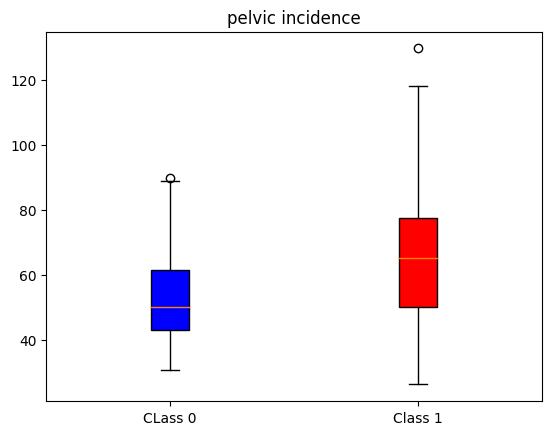

In [196]:
#bio_attr = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis','class']
NO = c2[c2["class"] == 0]
AB = c2[c2["class"] == 1] 
for attr1 in range(0,len(bio_set)):
    data=[NO[bio_set[attr1]].to_list(),AB[bio_set[attr1]].to_list()]
    bp = plt.boxplot(data, labels = ['CLass 0','Class 1'],patch_artist=True)
    plt.title(bio_set[attr1])
    colors = ['blue', 'red']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.show()

(b)iii.Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

Ans: train_x , train_y, test_x, test_y

In [229]:
train_0 = NO[0:70]
train_1 = AB[0:140]

train = pd.concat([train_0,train_1])
train_df_y = train.loc[:, train.columns=='class'] 
train_df_X = train.loc[:, train.columns!='class'] 

train_x = np.array(train_df_X)#train datapoint without label
train_y = np.array(train_df_y).astype('int').ravel()#train data's label

test_0 = NO[70:]
test_1 = AB[140:]

test = pd.concat([test_0,test_1])
test_df_y = test.loc[:, test.columns=='class']
test_df_X = test.loc[:, test.columns!='class']

test_x = np.array(test_df_X)#test datapoint without label
test_y = np.array(test_df_y).astype('int').ravel()#test data's label

train_x, train_y, test_x, test_y

(array([[ 38.51,  16.96,  35.11,  21.54, 127.63,   7.99],
        [ 54.92,  18.97,  51.6 ,  35.95, 125.85,   2.  ],
        [ 44.36,   8.95,  46.9 ,  35.42, 129.22,   4.99],
        ...,
        [ 83.4 ,  34.31,  78.42,  49.09, 110.47,  49.67],
        [ 72.05,  24.7 ,  79.87,  47.35, 107.17,  56.43],
        [ 85.1 ,  21.07,  91.73,  64.03, 109.06,  38.03]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

(c)Classification using KNN on Vertebral Column Data Set

i.Write code for k-nearest neighbors with Euclidean metric (or use a softwarepackage).

In [198]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn.fit(train_x, train_y)#x = datapoint y = label
knn.predict(test_x)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

ii.Test all the data in the test database with knearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k∈ {208,205, . . . ,7,4,1,}(in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values?  Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k=k∗

k* = 4
f1: 0.95833 TPR: 0.5 TNR: 0.0 precision: 0.9324324324324325

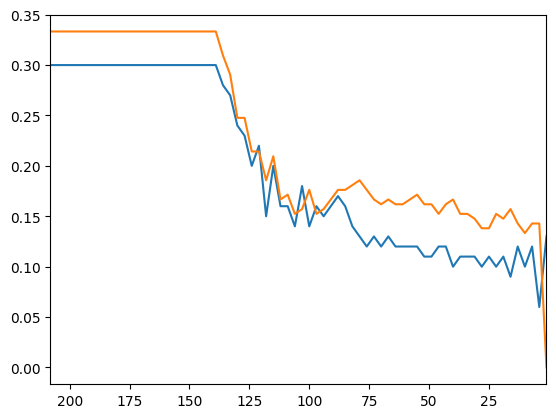

4

In [199]:
def knn(k, p, test_x, test_y, train_x,train_y):
    knn = KNeighborsClassifier(n_neighbors = k, p = p)
    knn.fit(train_x, train_y)

    train_score = knn.score(train_x, train_y)
    test_score=knn.score(test_x, test_y)
    return train_score, test_score

k = []
for i in reversed(range(1,209,3)):
    k.append(i)
    
k_test = [] #test error = 1 - score
k_train = [] 
for i in k:
    model_train, model_test = knn(i, 2, test_x, test_y, train_x,train_y)
    k_train.append(1-model_train)
    k_test.append(1-model_test)
    
plt.plot(k,k_test)
plt.plot(k,k_train)
plt.xlim(max(k),min(k))

plt.show()

k_testindex = []
for k_ in range(len(k_test)):
    if k_test[k_] == min(k_test):
        k_testindex.append(k_)
        
kstar_test = k[k_testindex[-1]] #4
kstar_test

f1: 0.9583333333333333 TPR: 0.5 TNR: 0.0 precision: 0.9324324324324325


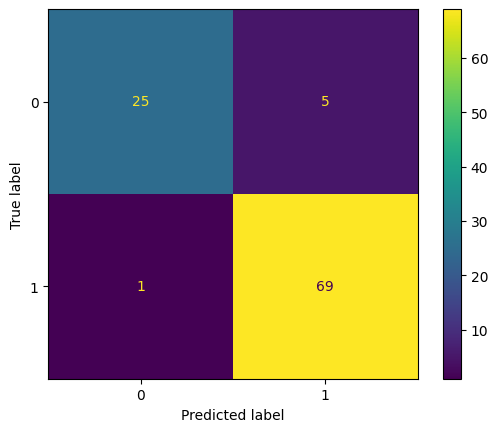

In [231]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

knn_star = KNeighborsClassifier(n_neighbors = 4, p = 2)
knn_star.fit(train_x, train_y)#x = datapoint y = label
preds = knn_star.predict(test_x)

cm = confusion_matrix(test_y, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#f1 score
f1 = f1_score(test_y, preds)
TN, FP, FN, TP = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
#true positive rate
TPR = TP/(TP+FN)
#true negative rate
TNR = TN/(TN+FP) 
#precision
precision = precision_score(test_y, preds)

print('f1:',f1, 'TPR:',TPR,'TNR:',TNR, 'precision:',precision)

iii.Since the computation time depends on the size of the training set, one may only use a subset of the training set. 

Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N∈ {10,20,30, . . . ,210}.(Note: for each N, select your training set by choosing the first b N/3 c rows of Class 0 and the first N− bN/3c rows of Class 1 in the training set you created in 1(b)iii.)

Also, for each N, select the optimal k from a set starting from k= 1, increasing by 5. For example, if N=200, the optimal k is selected from{1,6,11, . . . ,196}.This plot is called a Learning Curve


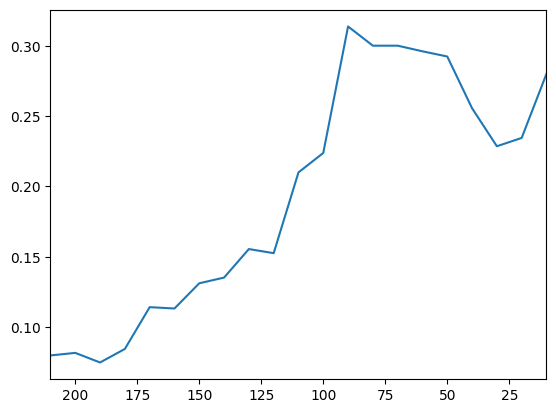

In [201]:
#data preprocessing 
def dfpre(N):
    nfor0 = N//3
    nfor1 = N - nfor0
    train_0 = NO[0:nfor0]
    train_1 = AB[0:nfor1]

    train = pd.concat([train_0,train_1])
    train_df_y = train.loc[:, train.columns=='class'] 
    train_df_X = train.loc[:, train.columns!='class'] 

    train_x = np.array(train_df_X)#train datapoint without label
    train_y = np.array(train_df_y).astype('int').ravel()#train data's label

    test_0 = NO[nfor0:]
    test_1 = AB[nfor1:]

    test = pd.concat([test_0,test_1])
    test_df_y = test.loc[:, test.columns=='class']
    test_df_X = test.loc[:, test.columns!='class']

    test_x = np.array(test_df_X)#test datapoint without label
    test_y = np.array(test_df_y).astype('int').ravel()#test data's label

    return test_x,test_y,train_x,train_y

#test_x = dfpre(N)[0]
#test_y = dfpre(N)[1]
#test_score = knn(3,2,dfpre(10)[0],dfpre(10)[1],dfpre(10)[2],dfpre(10)[3])[1]

def findkstar(n, p,test_x, test_y, train_x, train_y):#find k* in reversed(range(1,197,5)), return int k*
    k = []
    for i in reversed(range(1,n,5)):#N = 200, k = {1,6,11, . . . ,196}
        k.append(i)

    k_test = []#best score
    for i in k:
        model_train, model_test = knn(i, 2, test_x, test_y, train_x,train_y)
        k_test.append(1- model_test)
    
    k_testindex = []
    for k_ in range(len(k_test)):
        if k_test[k_] == min(k_test):
            k_testindex.append(k_)

    kstar_test = k[k_testindex[-1]]
    #print(max(k_test),[k[k_] for k_ in k_testindex],k_test)
    return kstar_test

N = []#training set N ∈ {10,20,30, . . . ,210}
best_test_errors = []

for n in range(10,211,10):
    N.append(n)
    dfpre(n)
    kstar = findkstar(n,2,dfpre(n)[0],dfpre(n)[1],dfpre(n)[2],dfpre(n)[3])
    besttesterror = 1 - (knn(kstar, 2, dfpre(n)[0],dfpre(n)[1],dfpre(n)[2],dfpre(n)[3])[1])
    best_test_errors.append(besttesterror)

plt.xlim(max(N),min(N))
plt.plot(N,best_test_errors)#learning curve for each (N traning set,test error)


(d)Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k=k∗) in a table. Use all of your training data and select the best k when{1,6,11, . . . ,196}

i.Minkowski Distance 
Ans: 
A.6
B. log10(p) ∈ 0.6
C. 6


In [202]:
#A manhattan
p1 = findkstar(210,1,test_x, test_y, train_x, train_y)
print(p1)

def log_kstar(p,test_x, test_y, train_x, train_y):#find k* in reversed(range(1,197,5)), return int k*
 
    k = []
    for i in reversed(range(1,210,5)):#N = 200, k = {1,6,11, . . . ,196}
        k.append(i)

    k_test = []
    for i in k:
        k_test.append(knn(i, p, test_x, test_y, train_x,train_y)[1])

    k_testindex = []
    for k_ in range(len(k_test)):
        if k_test[k_] == max(k_test):
            k_testindex.append(k_)

    kstar_test = k[k_testindex[-1]]
    #print(max(k_test),[k[k_] for k_ in k_testindex],k_test)
    return max(k_test),k_testindex

#B log10(p) = 0.6
logp = []
log_best_k_p =[]
for i in range(1,11):
    logp.append(i/10)#0.1,0.2..
    
for log in logp:
    p = 10**log #10^0.1
    best_k = log_kstar(p,test_x, test_y, train_x, train_y)[0]
    log_best_k_p.append([best_k,log]) #[0.94,0.6]

maxscore = 0
best_p = 0
for score, log in log_best_k_p:
    
    if score > maxscore:
        maxscore = score
        best_p = log
print(best_p)

#c p = infinite
p3 = findkstar(210,np.inf,test_x, test_y, train_x, train_y)
print(p3)

6
0.6
6


(210, 6)

ii.Mahalanobis Distance  
Ans: 76
	

In [212]:
def mahalaknn(k, test_x, test_y, train_x,train_y):
    
    knn = KNeighborsClassifier(n_neighbors = k, algorithm='brute', metric='mahalanobis', metric_params = {'VI':np.cov(train_x)})
    knn.fit(train_x, train_y)
    return knn.score(test_x, test_y)

def mahalakstar(n, test_x, test_y, train_x, train_y):#find k* in reversed(range(1,197,5)), return int k*
    k = []
    for i in reversed(range(1,n,5)):#N = 200, k = {1,6,11, . . . ,196}
        k.append(i)

    k_test = []#best score
    for i in k:
        model_test = mahalaknn(i, test_x, test_y, train_x, train_y)
        k_test.append(1- model_test)
    
    k_testindex = []
    for k_ in range(len(k_test)):
        if k_test[k_] == min(k_test):
            k_testindex.append(k_)

    kstar_test = k[k_testindex[-1]]
    #print(max(k_test),[k[k_] for k_ in k_testindex],k_test)
    return kstar_test

mahalakstar(210, test_x, test_y, train_x, train_y)

76

(e)The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportionalto its distance from the query/test data point. In this case, closer neighbors of a query point will havea greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k∈ {1,6,11,16, . . . ,196}

Ans:
manhattan,euclidean,chebyshe: 26,6,16


In [233]:
def e_knn(k, p, w, test_x, test_y, train_x,train_y):
    knn = KNeighborsClassifier(n_neighbors = k, weights = w, p = p )
    knn.fit(train_x, train_y)
    test_score=knn.score(test_x, test_y)
    return test_score

def e_kstar(n, p, w, test_x, test_y, train_x, train_y):#find k* in reversed(range(1,197,5)), return int k*
    k = []
    for i in reversed(range(1,n,5)):#N = 200, k = {1,6,11, . . . ,196}
        k.append(i)
    k_test = []#best score
    
    for i in k:
        model_test = e_knn(i, p, w, test_x, test_y, train_x,train_y)
        k_test.append(1- model_test)
    
    k_testindex = []
    for k_ in range(len(k_test)):
        if k_test[k_] == min(k_test):
            k_testindex.append(k_)

    kstar_test = k[k_testindex[-1]]
    #print(max(k_test),[k[k_] for k_ in k_testindex],k_test)
    return kstar_test

w = 'distance'
manhattan = e_kstar(210, 1, w, test_x, test_y, train_x, train_y)
euclidean = e_kstar(210, 2, w, test_x, test_y, train_x, train_y)
chebyshev = e_kstar(210, np.inf, w, test_x, test_y, train_x, train_y)
print(manhattan,euclidean,chebyshev)

26 6 16


(f)What is the lowest training error rate you achieved in this homework? 0.13

In [249]:
1-train_score

0.1333333333333333